In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..\..\..\VSCOODE'))
	print(os.getcwd())
except:
	pass


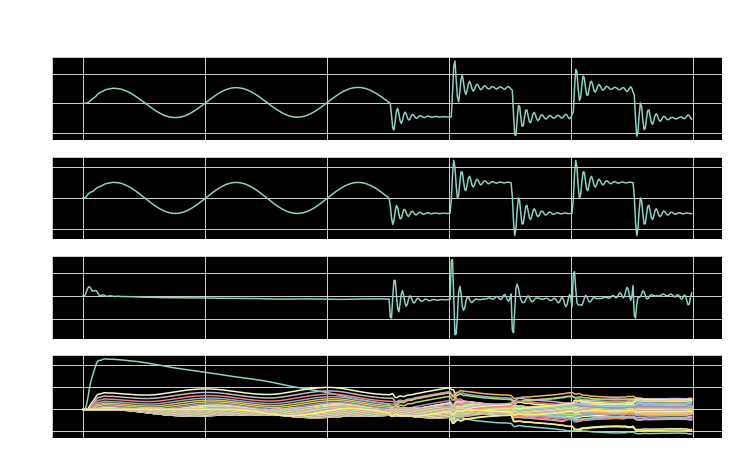

40.60547886985644


In [49]:
from IPython.display import display,Math
import matplotlib.pyplot as plt
import string 
import numpy as np
from math import factorial as fact   
from scipy.integrate import odeint


def fdxdt(xx,t,u,Omega,eta,b0,b1):    # x=[x1 x2 ... xn] vektor hodnot n stavovych velicin
          dx1dt = -Omega0**2*xx[1]-b0*u
          dx2dt = -2*eta*Omega0*xx[1]-b1*u+xx[0]
          return(dx1dt,dx2dt)

dt = .1  #[sec]
t = np.arange(0,50,dt) ; N = len(t)  # delka dat
Npul = int(N/2)  # konverze na integer
u = np.sin(2*np.pi/10*t); u[Npul+1:] = np.sign(u[Npul+1:]) # Vstup do systému
Omega0 = 10;  eta = .1;   b0 = Omega0**2;  b1 = 0
z = np.zeros(N)
x10 = 0 ; x20=0  # poc. podm
x0 = [x10,x20]


for i in range(0,N-1):
    tt = [t[i],t[i+1]]  # [t1 t2]
    xx = odeint(fdxdt,x0,t,(u[i],Omega0,eta,b0,b1)) #returns x=[ [x1(t1) x2(t1)] [x1(t2) x2(t2)]]
#    x = odeint(fdxdt,x0,tt,args=(u[i],)) # <-- pokud je jen jeden extra argument, musi se tak    
    z[i+1] = -xx[1,1]
    x0 = xx[1,:]  # jako nove poc. podm pro dalsi integraci
    

y = np.zeros(len(t))
w = np.zeros(120)
x = np.zeros(120)
x[0] = 1 
e = np.zeros(len(t))
wall = np.zeros((len(t), 120))
mi = 2

for i in range(len(t)):
    y[i] = np.dot(w, x)
    e[i] = z[i] - y[i]
    minorm = mi/(5+np.dot(x,x.T))
    x[2:] = x[1:-1]
    if i>0:
        x[1] = z[i-1]
    dydw = x
    dw = minorm*e[i]*dydw
    w = w + dw
    wall[i, :] = w

plt.figure(figsize=(12,7))
plt.subplot(4, 1, 1)
plt.plot(t, y); plt.grid(); plt.xlabel('t')
plt.ylabel("u4 predikované")

plt.subplot(4, 1, 2)
plt.plot(t, z); plt.grid(); plt.xlabel('t')
plt.ylabel("u4 skutečné")

plt.subplot(4, 1, 3)
plt.plot(t, e); plt.grid(); plt.xlabel('t')
plt.ylabel("Chyba")

plt.subplot(4, 1, 4)
plt.plot(t, wall); plt.grid(); plt.xlabel('t')
plt.ylabel("Hodnoty vah")

plt.suptitle("Predikovaná vs. skutečná hodnota, chyba a váhy", fontsize=20)
plt.subplots_adjust(top=0.88)
plt.show()

print(sum(abs(e)))